<a href="https://colab.research.google.com/github/cypherkrish/Machine-Learning-Basics/blob/main/01_02_Polynomyamr_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cypherkrish/Machine-Learning-Basics/main/Data/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis = 1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing  import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
ploy_features = polynomial_converter.transform(X)

In [10]:
ploy_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
ploy_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
# We can use => fit_transform as well

In [15]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_tets , y_train , y_test = train_test_split(ploy_features, y, test_size = 0.33, random_state = 42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model_lr = LinearRegression()

In [20]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [21]:
test_pred = model_lr.predict(X_tets)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_pred)

In [24]:
MSE = mean_squared_error(y_test, test_pred)

In [25]:
MAE

0.5475837919149653

In [26]:
MSE

0.4603062493888319

In [27]:
RMSE = np.sqrt (MSE)

In [28]:
RMSE

0.678458730792693

In [29]:
model_lr.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [31]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [32]:
ploy_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

## Create different order ploynomyals
## Split  train and teat ploy test sets
## fit on train data
## store/save  rmse forboth training and test set
## Plot the results (error vs ploy order)

In [39]:
# Create different order ploynomyals
# Split  train and teat ploy test sets
# fit on train data
# store/save  rmse forboth training and test set

from sklearn.preprocessing  import PolynomialFeatures

In [42]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
  poly_converter = PolynomialFeatures(degree = d, include_bias = False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test,y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)


In [43]:
train_rmse_errors

[1.5526939990087725,
 0.6057702019226604,
 0.4756847293184344,
 0.3742987908933714,
 0.2410875823801666,
 0.19377531282935126,
 3.5709135746863305,
 0.12601501471301507,
 0.12106161976471726]

In [44]:
test_rmse_errors

[1.9307843822347202,
 0.678458730792693,
 0.5148267621824684,
 1.275058965674257,
 6.410701346538983,
 24.73301992554768,
 549.7605878207895,
 9821.456503412912,
 183513.46459732568]

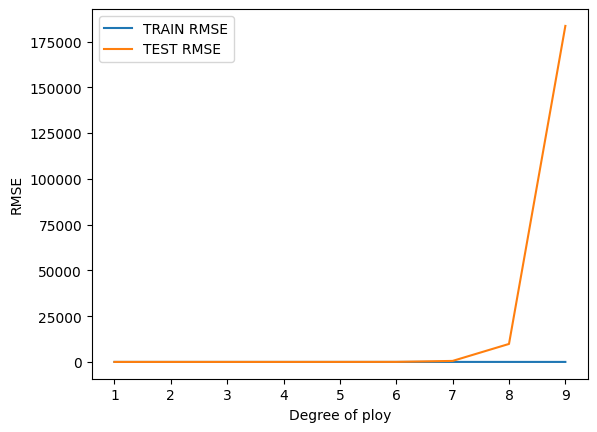

In [56]:
plt.plot(range(1, 10), train_rmse_errors, label = 'TRAIN RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST RMSE')
plt.xlabel('Degree of ploy')
plt.ylabel('RMSE')
plt.legend()

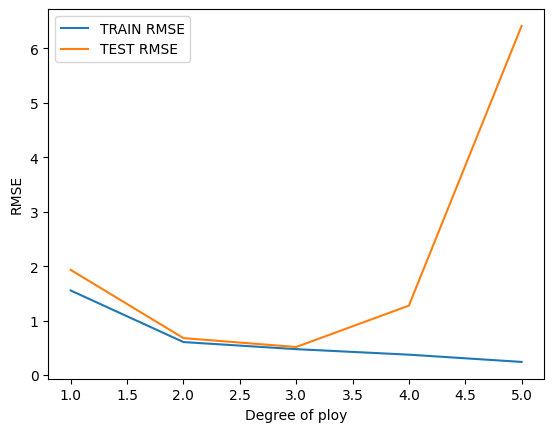

In [57]:
plt.plot(range(1, 6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE')
plt.xlabel('Degree of ploy')
plt.ylabel('RMSE')
plt.legend()

# Model deployment

In [58]:
# here, from the graph we can have 3rd degree polynomyal for our predective model

In [59]:
final_ploy_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [60]:
final_model = LinearRegression()

In [65]:
full_converted_X = final_ploy_converter.fit_transform(X)

In [66]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [67]:
from joblib import dump, load

In [68]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [69]:
dump(final_ploy_converter, 'final_ploy_converter_dump.joblib')

['final_ploy_converter_dump.joblib']

In [70]:
# Testing

In [71]:
load_converter = load('final_ploy_converter_dump.joblib')

In [72]:
load_model = load('final_poly_model.joblib')

In [73]:
campaign = [[149, 22, 12]]

In [75]:
transformed_data = load_converter.fit_transform(campaign)

In [76]:
transformed_data.shape

(1, 19)

In [77]:
load_model.predict(transformed_data)

array([14.64501014])